## 欠損値の処理

In [1]:
from modules.constants import local_paths
from modules import predict
import os
import numpy as np
import pandas as pd
import pickle

%load_ext autoreload 

In [2]:
%autoreload

In [3]:
df = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features_20_to_21.csv'), index_col=0,  sep="\t", 
                 dtype={'jockey_id': str, 'trainer_id': str, 'owner_id': str})

In [4]:
df.columns

Index(['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'owner_id', 'rank',
       'frame', 'number', 'sex', 'age',
       ...
       'jockey_dirt_win_sum_last_two_years',
       'jockey_win_proba_mean_last_two_years',
       'jockey_win_proba_max_last_two_years',
       'jockey_top_2_proba_mean_last_two_years',
       'jockey_top_2_proba_max_last_two_years',
       'jockey_top_3_proba_mean_last_two_years',
       'jockey_top_3_proba_max_last_two_years',
       'jockey_earned_prize_mean_last_two_years',
       'jockey_earned_prize_max_last_two_years',
       'jockey_earned_prize_sum_last_two_years'],
      dtype='object', length=206)

In [5]:
df

,race_id,horse_id,jockey_id,trainer_id,owner_id,rank,frame,number,sex,age,...,jockey_dirt_win_sum_last_two_years,jockey_win_proba_mean_last_two_years,jockey_win_proba_max_last_two_years,jockey_top_2_proba_mean_last_two_years,jockey_top_2_proba_max_last_two_years,jockey_top_3_proba_mean_last_two_years,jockey_top_3_proba_max_last_two_years,jockey_earned_prize_mean_last_two_years,jockey_earned_prize_max_last_two_years,jockey_earned_prize_sum_last_two_years
0,202101010101,2018104780,01144,01136,414030,15.0,1,1,0,3,...,28.0,0.0,0.0,0.1325,0.149,0.1920,0.211,60291.30,69338.7,120582.6
1,202101010101,2018100570,00666,01039,728008,6.0,1,2,1,3,...,104.0,0.0,0.0,0.3150,0.327,0.4120,0.417,231707.70,232931.3,463415.4
2,202101010101,2018101518,01173,01093,942006,10.0,2,3,1,3,...,17.0,0.0,0.0,0.0525,0.059,0.0930,0.101,19622.50,25462.0,39245.0
3,202101010101,2018101447,01091,01076,546800,12.0,2,4,0,3,...,16.0,0.0,0.0,0.1040,0.111,0.1790,0.186,63576.30,65813.8,127152.6
4,202101010101,2018101539,01015,00417,163002,5.0,3,5,1,3,...,22.0,0.0,0.0,0.1220,0.131,0.1765,0.182,48988.85,53312.8,97977.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47871,202010020812,2017106438,01152,01098,478030,2.0,6,11,0,3,...,16.0,0.0,0.0,0.0805,0.089,0.1200,0.130,25200.05,33128.0,50400.1
47872,202010020812,2017103149,01168,01039,933006,9.0,7,12,1,3,...,28.0,0.0,0.0,0.0785,0.100,0.1375,0.154,27746.95,42461.5,55493.9
47873,202010020812,2017105123,01166,01087,506800,15.0,7,13,1,3,...,34.0,0.0,0.0,0.1130,0.125,0.1895,0.198,49791.85,55710.9,99583.7
47874,202010020812,2016110126,01115,01022,138007,12.0,8,14,0,4,...,49.0,0.0,0.0,0.2110,0.215,0.3135,0.319,129619.45,131236.6,259238.9


In [6]:
df.dropna()

,race_id,horse_id,jockey_id,trainer_id,owner_id,rank,frame,number,sex,age,...,jockey_dirt_win_sum_last_two_years,jockey_win_proba_mean_last_two_years,jockey_win_proba_max_last_two_years,jockey_top_2_proba_mean_last_two_years,jockey_top_2_proba_max_last_two_years,jockey_top_3_proba_mean_last_two_years,jockey_top_3_proba_max_last_two_years,jockey_earned_prize_mean_last_two_years,jockey_earned_prize_max_last_two_years,jockey_earned_prize_sum_last_two_years
0,202101010101,2018104780,01144,01136,414030,15.0,1,1,0,3,...,28.0,0.0,0.0,0.1325,0.149,0.1920,0.211,60291.30,69338.7,120582.6
1,202101010101,2018100570,00666,01039,728008,6.0,1,2,1,3,...,104.0,0.0,0.0,0.3150,0.327,0.4120,0.417,231707.70,232931.3,463415.4
2,202101010101,2018101518,01173,01093,942006,10.0,2,3,1,3,...,17.0,0.0,0.0,0.0525,0.059,0.0930,0.101,19622.50,25462.0,39245.0
3,202101010101,2018101447,01091,01076,546800,12.0,2,4,0,3,...,16.0,0.0,0.0,0.1040,0.111,0.1790,0.186,63576.30,65813.8,127152.6
4,202101010101,2018101539,01015,00417,163002,5.0,3,5,1,3,...,22.0,0.0,0.0,0.1220,0.131,0.1765,0.182,48988.85,53312.8,97977.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47871,202010020812,2017106438,01152,01098,478030,2.0,6,11,0,3,...,16.0,0.0,0.0,0.0805,0.089,0.1200,0.130,25200.05,33128.0,50400.1
47872,202010020812,2017103149,01168,01039,933006,9.0,7,12,1,3,...,28.0,0.0,0.0,0.0785,0.100,0.1375,0.154,27746.95,42461.5,55493.9
47873,202010020812,2017105123,01166,01087,506800,15.0,7,13,1,3,...,34.0,0.0,0.0,0.1130,0.125,0.1895,0.198,49791.85,55710.9,99583.7
47874,202010020812,2016110126,01115,01022,138007,12.0,8,14,0,4,...,49.0,0.0,0.0,0.2110,0.215,0.3135,0.319,129619.45,131236.6,259238.9


In [7]:
returns = pd.read_csv(os.path.join(local_paths.COMPLETED_DIR, 'returns_22_to_23.csv'), index_col=0 ,sep="\t")
returns

,race_id,単勝_rank,単勝_returns,複勝_rank,複勝_returns,枠連_rank,枠連_returns,馬連_rank,馬連_returns,ワイド_rank,ワイド_returns,馬単_rank,馬単_returns,三連複_rank,三連複_returns,三連単_rank,三連単_returns
0,202206010101,[15],[680],"[15, 10, 4]","[210, 1600, 170]","[5, 8]",[2680],"[10, 15]",[31040],"[10, 15, 4, 15, 4, 10]","[6890, 660, 5640]","[15, 10]",[46070],"[4, 10, 15]",[46240],"[15, 10, 4]",[338400]
1,202206010102,[1],[1510],"[1, 8, 10]","[280, 110, 220]","[1, 4]",[860],"[1, 8]",[1060],"[1, 8, 1, 10, 8, 10]","[520, 1710, 350]","[1, 8]",[3510],"[1, 8, 10]",[2650],"[1, 8, 10]",[21660]
2,202206010103,[5],[430],"[5, 7, 11]","[130, 2620, 110]","[3, 4]",[2750],"[5, 7]",[63780],"[5, 7, 5, 11, 7, 11]","[11540, 180, 8280]","[5, 7]",[82850],"[5, 7, 11]",[24950],"[5, 7, 11]",[224010]
3,202206010104,[5],[630],"[5, 6, 10]","[190, 120, 450]","[5, 6]",[520],"[5, 6]",[580],"[5, 6, 5, 10, 6, 10]","[320, 2520, 1010]","[5, 6]",[1570],"[5, 6, 10]",[5090],"[5, 6, 10]",[24170]
4,202206010105,[8],[190],"[8, 6, 9]","[110, 110, 140]","[6, 8]",[190],"[6, 8]",[240],"[6, 8, 8, 9, 6, 9]","[140, 210, 260]","[8, 6]",[440],"[6, 8, 9]",[320],"[8, 6, 9]",[1210]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,202309050908,[8],[270],"[8, 14, 3]","[160, 170, 650]","[5, 8]",[520],"[8, 14]",[840],"[8, 14, 3, 8, 3, 14]","[440, 1960, 3500]","[8, 14]",[1490],"[3, 8, 14]",[12740],"[8, 14, 3]",[35560]
3452,202309050909,[16],[350],"[16, 9, 14]","[200, 1410, 460]","[5, 8]",[1970],"[9, 16]",[12570],"[9, 16, 14, 16, 9, 14]","[3580, 1190, 6950]","[16, 9]",[15500],"[9, 14, 16]",[46670],"[16, 9, 14]",[144610]
3453,202309050910,[11],[1710],"[11, 6, 9]","[390, 200, 190]","[6, 8]",[630],"[6, 11]",[3770],"[6, 11, 9, 11, 6, 9]","[1160, 1600, 630]","[11, 6]",[8960],"[6, 9, 11]",[7020],"[11, 6, 9]",[68800]
3454,202309050911,[15],[610],"[15, 10, 5]","[170, 110, 170]","[6, 8]",[430],"[10, 15]",[500],"[10, 15, 5, 15, 5, 10]","[290, 720, 280]","[15, 10]",[1410],"[5, 10, 15]",[1420],"[15, 10, 5]",[8900]


In [8]:
df_22_23 = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features.csv'), 
                    index_col=0,  sep="\t", dtype={'jockey_id': str, 'trainer_id': str, 'owner_id': str})
df_22_23.columns

Index(['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'owner_id', 'rank',
       'frame', 'number', 'sex', 'age',
       ...
       'jockey_dirt_win_sum_last_two_years',
       'jockey_win_proba_mean_last_two_years',
       'jockey_win_proba_max_last_two_years',
       'jockey_top_2_proba_mean_last_two_years',
       'jockey_top_2_proba_max_last_two_years',
       'jockey_top_3_proba_mean_last_two_years',
       'jockey_top_3_proba_max_last_two_years',
       'jockey_earned_prize_mean_last_two_years',
       'jockey_earned_prize_max_last_two_years',
       'jockey_earned_prize_sum_last_two_years'],
      dtype='object', length=206)

In [9]:
with open(os.path.join(local_paths.MODELS_DIR, '2022_model_1_1.pickle'), mode='rb') as f:
  model = pickle.load(f)

## RFmodel

In [190]:
%autoreload

In [199]:
rf = predict.RFModel(
  train_df=df, returns_df=returns, bet_type='sanrentan', threshold=0.6, max_bet=1000, pivot_horse=True, stochastic_variation=False)
pred_df = rf.predict_target(df_22_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[7934 1956]
 [1367 1502]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.83      9890
           1       0.43      0.52      0.47      2869

    accuracy                           0.74     12759
   macro avg       0.64      0.66      0.65     12759
weighted avg       0.76      0.74      0.75     12759

Accuracy: 0.7395563915667372
Selected Feature Importance:
                                      feature  importance
81       rank_mean_in_mode_course_len_past_5    0.026714
90      prize_mean_in_mode_course_len_past_5    0.021894
91       prize_sum_in_mode_course_len_past_5    0.019324
44                         prize_mean_past_5    0.017779
69              rank_mean_in_mode_course_len    0.017124
34                          rank_mean_past_5    0.016859
18                                 rank_mean    0.015687
45                          prize_sum_past_5    0.014439
85  rank_diff_mean_in_mode_cour

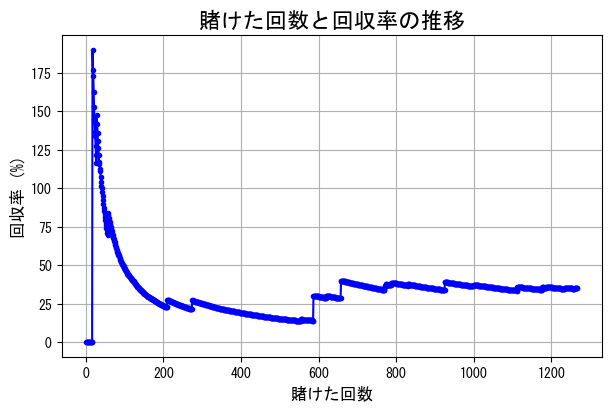

総払い戻し金額: 236070.0円
賭けた回数: 1267回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010103,0.0,600,600,0.0,0.000000,-600.0
1,202201010104,0.0,600,1200,0.0,0.000000,-1200.0
2,202201010106,0.0,200,1400,0.0,0.000000,-1400.0
3,202201010108,0.0,200,1600,0.0,0.000000,-1600.0
4,202201010112,0.0,600,2200,0.0,0.000000,-2200.0
...,...,...,...,...,...,...,...
1262,202310030507,0.0,600,668600,236070.0,0.353081,-432530.0
1263,202310030606,0.0,600,669200,236070.0,0.352764,-433130.0
1264,202310030607,0.0,600,669800,236070.0,0.352448,-433730.0
1265,202310030608,0.0,600,670400,236070.0,0.352133,-434330.0


In [200]:
rf.plot_returns_rate(df_22_23)

In [201]:
rf_returns = rf.calc_returns_rate(df_22_23)
rf_returns

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010103,0.0,600,600,0.0,0.000000,-600.0
1,202201010104,0.0,600,1200,0.0,0.000000,-1200.0
2,202201010106,0.0,200,1400,0.0,0.000000,-1400.0
3,202201010108,0.0,200,1600,0.0,0.000000,-1600.0
4,202201010112,0.0,600,2200,0.0,0.000000,-2200.0
...,...,...,...,...,...,...,...
1262,202310030507,0.0,600,668600,236070.0,0.353081,-432530.0
1263,202310030606,0.0,600,669200,236070.0,0.352764,-433130.0
1264,202310030607,0.0,600,669800,236070.0,0.352448,-433730.0
1265,202310030608,0.0,600,670400,236070.0,0.352133,-434330.0


In [202]:
rf_returns[rf_returns['returns'] > 0]

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
16,202201010606,15570.0,200,8200,15570.0,1.898780,7370.0
27,202201020608,5070.0,600,14000,20640.0,1.474286,6640.0
56,202203010106,4770.0,600,30200,25410.0,0.841391,-4790.0
209,202205030504,5890.0,600,112800,31300.0,0.277482,-81500.0
273,202206020703,8730.0,200,146400,40030.0,0.273429,-106370.0
554,202210010509,3120.0,200,289800,43150.0,0.148896,-246650.0
586,202210030706,50020.0,600,307000,93170.0,0.303485,-213830.0
619,202301010508,4960.0,600,324000,98130.0,0.302870,-225870.0
657,202302010412,40510.0,600,345600,138640.0,0.401157,-206960.0
770,202305010103,11550.0,600,409800,150190.0,0.366496,-259610.0


In [203]:
pred_df[(pred_df['predicted_target'] == 1) & (pred_df['race_id'] == 202201010606)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
783,202201010606,1.0,0.88,1
784,202201010606,2.0,0.72,1
793,202201010606,3.0,0.73,1


## NNmodel

In [13]:
%autoreload

In [14]:
nn = predict.NNModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.5, stochastic_variation=False)
pred_df = nn.predict_target(df_22_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[6646 3244]
 [ 865 2004]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.67      0.76      9890
           1       0.38      0.70      0.49      2869

    accuracy                           0.68     12759
   macro avg       0.63      0.69      0.63     12759
weighted avg       0.77      0.68      0.70     12759

Accuracy: 0.6779528176189357
predicted_target
0    30581
1    20914
Name: count, dtype: int64
            race_id  horse_id  jockey_id  trainer_id  owner_id  rank  frame  \
1      202201010101      9390         37          11       996   4.0      2   
3      202201010101      7667         75          19      1438   5.0      4   
6      202201010102      3823        130         146      1282   5.0      2   
7      202201010102      5378        108         154       677   1.0      3   
8      202201010102      4074         40         161       779   3.0      4   
...             ...       ...      

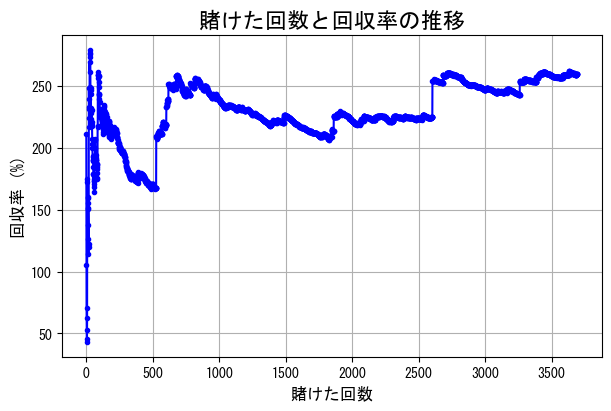

総払い戻し金額: 8974800.0円
賭けた回数: 3692回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010102,3170.0,1500,1500,3170.0,2.113333,1670.0
1,202201010103,0.0,1500,3000,3170.0,1.056667,170.0
2,202201010104,0.0,1500,4500,3170.0,0.704444,-1330.0
3,202201010106,0.0,1500,6000,3170.0,0.528333,-2830.0
4,202201010107,0.0,1000,7000,3170.0,0.452857,-3830.0
...,...,...,...,...,...,...,...
3687,202310030804,18650.0,600,3455500,8963830.0,2.594076,5508330.0
3688,202310030806,0.0,2800,3458300,8963830.0,2.591976,5505530.0
3689,202310030807,10970.0,2000,3460300,8974800.0,2.593648,5514500.0
3690,202310030808,0.0,1500,3461800,8974800.0,2.592524,5513000.0


In [15]:
nn.plot_returns_rate(df_22_23)

## LGBmodel

In [48]:
%autoreload

In [49]:
lgb = predict.LGBModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.5, stochastic_variation=False)
pred_df = lgb.predict_target(df_22_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

[LightGBM] [Info] Number of positive: 11526, number of negative: 11526
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035832 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28810
[LightGBM] [Info] Number of data points in the train set: 23052, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 11526, number of negative: 11526
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5697
[LightGBM] [Info] Number of data points in the train set: 23052, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Confusion Matrix:
 [[6886 3004]
 [ 848 2021]]
Classification Report:
               precision    recall  f1-score   supp

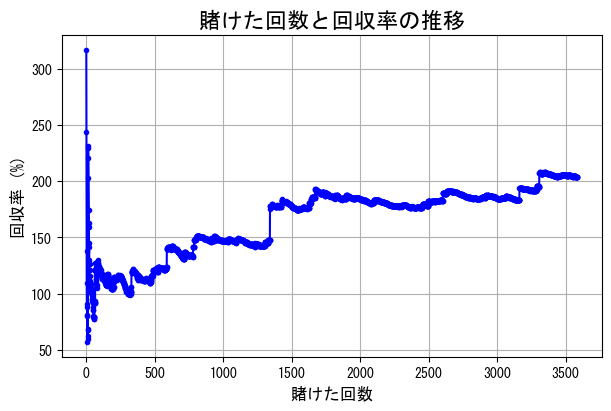

総払い戻し金額: 7237500.0円
賭けた回数: 3584回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010102,3170.0,1000,1000,3170.0,3.170000,2170.0
1,202201010103,0.0,300,1300,3170.0,2.438462,1870.0
2,202201010104,0.0,1000,2300,3170.0,1.378261,870.0
3,202201010106,0.0,600,2900,3170.0,1.093103,270.0
4,202201010107,0.0,600,3500,3170.0,0.905714,-330.0
...,...,...,...,...,...,...,...
3579,202310030802,0.0,1000,3550200,7218850.0,2.033364,3668650.0
3580,202310030803,0.0,400,3550600,7218850.0,2.033135,3668250.0
3581,202310030804,18650.0,2800,3553400,7237500.0,2.036782,3684100.0
3582,202310030808,0.0,1000,3554400,7237500.0,2.036209,3683100.0


In [50]:
lgb.plot_returns_rate(df_22_23)

## XGBmodel

In [51]:
%autoreload

In [52]:
xgb = predict.XGBModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.5, stochastic_variation=False)
pred_df = xgb.predict_target(df_22_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[6891 2999]
 [ 825 2044]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78      9890
           1       0.41      0.71      0.52      2869

    accuracy                           0.70     12759
   macro avg       0.65      0.70      0.65     12759
weighted avg       0.78      0.70      0.72     12759

Accuracy: 0.7002899913786347
Selected Feature Importance:
                                       feature  importance
81        rank_mean_in_mode_course_len_past_5    0.071505
34                           rank_mean_past_5    0.031553
82         rank_min_in_mode_course_len_past_5    0.019860
19                                   rank_min    0.015826
147               jockey_stakes_win_last_year    0.015785
44                          prize_mean_past_5    0.014548
157              jockey_top_3_proba_last_year    0.014343
35                            rank_min_past_5    0.012685
158             jockey

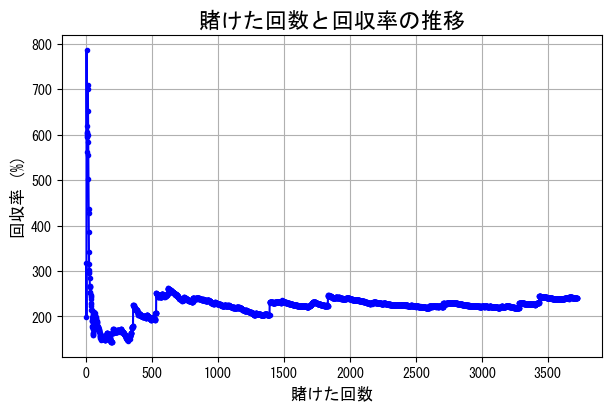

総払い戻し金額: 8558820.0円
賭けた回数: 3722回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010102,3170.0,1000,1000,3170.0,3.170000,2170.0
1,202201010103,0.0,600,1600,3170.0,1.981250,1570.0
2,202201010104,14140.0,600,2200,17310.0,7.868182,15110.0
3,202201010106,0.0,600,2800,17310.0,6.182143,14510.0
4,202201010107,0.0,100,2900,17310.0,5.968966,14410.0
...,...,...,...,...,...,...,...
3717,202310030802,0.0,600,3548600,8529200.0,2.403539,4980600.0
3718,202310030803,0.0,400,3549000,8529200.0,2.403269,4980200.0
3719,202310030804,18650.0,3600,3552600,8547850.0,2.406083,4995250.0
3720,202310030807,10970.0,2100,3554700,8558820.0,2.407747,5004120.0


In [53]:
xgb.plot_returns_rate(df_22_23)

## Ensamblemodel

In [22]:
df.columns

Index(['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'owner_id', 'rank',
       'frame', 'number', 'sex', 'age',
       ...
       'jockey_dirt_win_sum_last_two_years',
       'jockey_win_proba_mean_last_two_years',
       'jockey_win_proba_max_last_two_years',
       'jockey_top_2_proba_mean_last_two_years',
       'jockey_top_2_proba_max_last_two_years',
       'jockey_top_3_proba_mean_last_two_years',
       'jockey_top_3_proba_max_last_two_years',
       'jockey_earned_prize_mean_last_two_years',
       'jockey_earned_prize_max_last_two_years',
       'jockey_earned_prize_sum_last_two_years'],
      dtype='object', length=206)

In [245]:
%autoreload

In [252]:
en = predict.EnsembleModel(
  train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.6, 
  stochastic_variation=False, max_bet=1000, pivot_horse=True
)
pred_df = en.predict_target(df_22_23)
print(pred_df['predicted_target'].value_counts())



 training... 


Confusion Matrix:
 [[5112 1251]
 [ 883  920]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.83      6363
           1       0.42      0.51      0.46      1803

    accuracy                           0.74      8166
   macro avg       0.64      0.66      0.65      8166
weighted avg       0.76      0.74      0.75      8166

Accuracy: 0.7386725446975263
Selected Feature Importance:
                                      feature  importance
81       rank_mean_in_mode_course_len_past_5    0.025798
90      prize_mean_in_mode_course_len_past_5    0.022221
91       prize_sum_in_mode_course_len_past_5    0.020695
44                         prize_mean_past_5    0.018427
34                          rank_mean_past_5    0.016031
69              rank_mean_in_mode_course_len    0.015398
85  rank_diff_mean_in_mode_course_len_past_5    0.014830
18                                 rank_mean    0.013789
45            

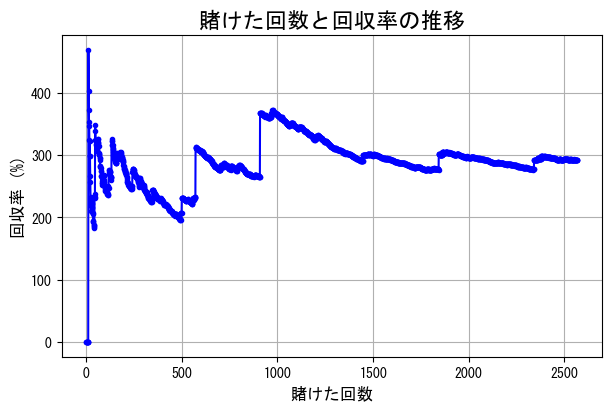

総払い戻し金額: 2748750.0円
賭けた回数: 2566回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010102,0.0,400,400,0.0,0.000000,-400.0
1,202201010104,0.0,300,700,0.0,0.000000,-700.0
2,202201010106,0.0,100,800,0.0,0.000000,-800.0
3,202201010107,0.0,100,900,0.0,0.000000,-900.0
4,202201010109,0.0,1000,1900,0.0,0.000000,-1900.0
...,...,...,...,...,...,...,...
2561,202310030707,0.0,100,942900,2748750.0,2.915208,1805850.0
2562,202310030802,0.0,300,943200,2748750.0,2.914281,1805550.0
2563,202310030803,0.0,100,943300,2748750.0,2.913972,1805450.0
2564,202310030807,0.0,300,943600,2748750.0,2.913046,1805150.0


In [253]:
en.plot_returns_rate(df_22_23)

In [254]:
en_returns = en.calc_returns_rate(df_22_23)

In [255]:
129  / 2566  

0.07482598607888631

In [256]:
en_returns.head(30)

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010102,0.0,400,400,0.0,0.000000,-400.0
1,202201010104,0.0,300,700,0.0,0.000000,-700.0
2,202201010106,0.0,100,800,0.0,0.000000,-800.0
3,202201010107,0.0,100,900,0.0,0.000000,-900.0
4,202201010109,0.0,1000,1900,0.0,0.000000,-1900.0
5,202201010110,0.0,100,2000,0.0,0.000000,-2000.0
6,202201010112,0.0,100,2100,0.0,0.000000,-2100.0
7,202201010202,0.0,100,2200,0.0,0.000000,-2200.0
8,202201010203,0.0,100,2300,0.0,0.000000,-2300.0
9,202201010204,0.0,600,2900,0.0,0.000000,-2900.0


In [257]:
en_returns[en_returns['returns'] > 0]

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
11,202201010207,18740.0,1000,4000,18740.0,4.685000,14740.0
12,202201010210,1360.0,1000,5000,20100.0,4.020000,15100.0
16,202201010307,1960.0,1000,6800,22060.0,3.244118,15260.0
18,202201010310,3040.0,400,7800,25100.0,3.217949,17300.0
25,202201010508,1500.0,300,12200,26600.0,2.180328,14400.0
...,...,...,...,...,...,...,...
2528,202310020603,4070.0,600,931800,2729170.0,2.928923,1797370.0
2531,202310020612,3700.0,100,933500,2732870.0,2.927552,1799370.0
2532,202310030103,700.0,100,933600,2733570.0,2.927988,1799970.0
2546,202310030310,520.0,400,938300,2734090.0,2.913876,1795790.0


In [263]:
pred_df[(pred_df['predicted_target'] == 1) & (pred_df['race_id'] == 202310020603)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
45763,202310020603,4.0,0.793186,1
45767,202310020603,9.0,0.724678,1
45770,202310020603,2.0,0.879804,1
45771,202310020603,1.0,0.916840,1
45772,202310020603,3.0,0.720447,1


In [243]:
pred_df[pred_df['predicted_proba'] >= 0.85][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
21,202201010103,7.0,0.865527,1
40,202201010104,10.0,0.907863,1
60,202201010106,4.0,0.861829,1
66,202201010106,1.0,0.949900,1
160,202201010202,2.0,0.908619,1
...,...,...,...,...
47047,202310030708,2.0,0.895485,1
47116,202310030802,1.0,0.924134,1
47119,202310030802,3.0,0.909992,1
47177,202310030806,15.0,0.851016,1


In [244]:
pred_df[(pred_df['predicted_proba'] >= 0.85) & (pred_df['rank'] == 1)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
66,202201010106,1.0,0.949900,1
601,202201010503,1.0,0.940648,1
654,202201010507,1.0,0.873339,1
892,202201020101,1.0,0.891271,1
1121,202201020207,1.0,0.859515,1
...,...,...,...,...
46534,202310030408,1.0,0.881263,1
46693,202310030507,1.0,0.899776,1
46789,202310030602,1.0,0.922170,1
46992,202310030704,1.0,0.909107,1


In [242]:
887/2420

0.3665289256198347